# EX 1

Implement programs for time series data cleaning, loading and handling times series data and pre-processing techniques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load time series data
data=pd.read_csv("/content/Electric_Production (1).csv",parse_dates=['DATE'],index_col='DATE')

In [3]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [4]:
#handle missing values with forward-fill method
datafilled=data.fillna(method='ffill')

<ipython-input-4-d13153733c52>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datafilled=data.fillna(method='ffill')


In [5]:
#remove duplicate
data_cleaned=datafilled.drop_duplicates()

In [6]:
#identify outliers using z score method
from scipy.stats import zscore
z_scores=zscore(data_cleaned['IPG2211A2N'])
outliers=abs(z_scores)>3

#replace utliers with meadian value
data_cleaned.loc[outliers,'IPG2211A2N']=data_cleaned['IPG2211A2N'].median()

In [7]:
#normalize data
#min max normalization
data_cleaned['Normalized_Value']=(
    data_cleaned['IPG2211A2N']-data_cleaned['IPG2211A2N'].min())/(data_cleaned['IPG2211A2N'].max()-data_cleaned['IPG2211A2N'].min())


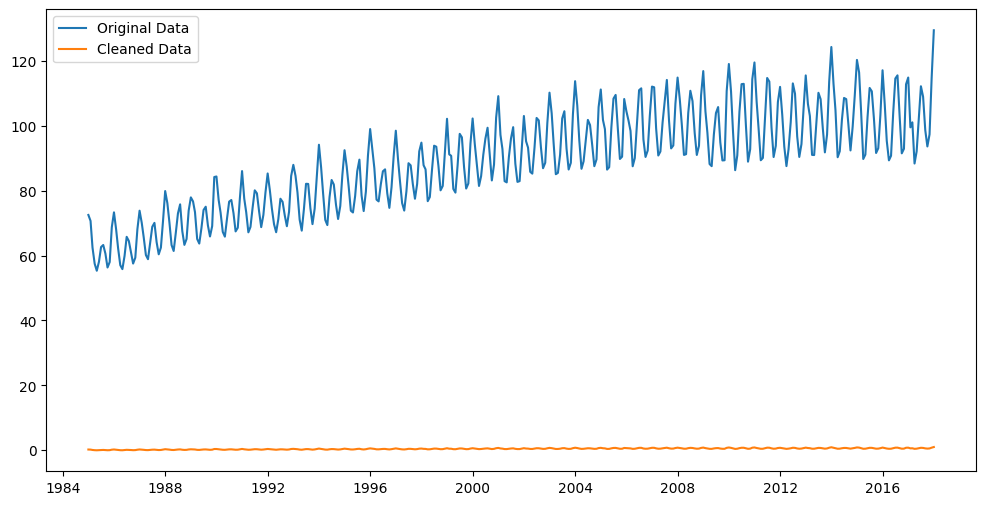

In [8]:
#evaluation metrics
plt.figure(figsize=(12,6))
plt.plot(data['IPG2211A2N'],label='Original Data')
plt.plot(data_cleaned['Normalized_Value'],label='Cleaned Data')
plt.legend()
plt.show()

            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151


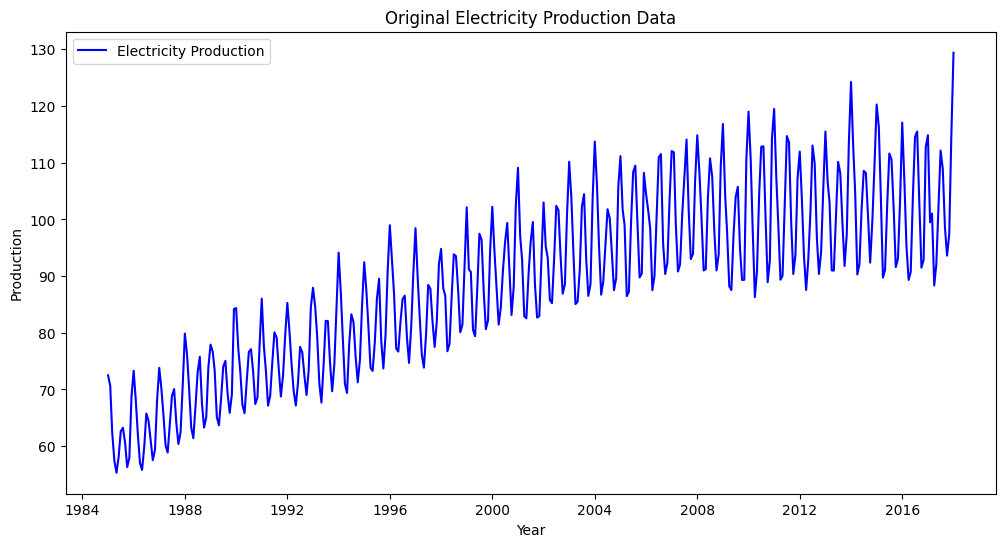

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv("/content/Electric_Production (1).csv", parse_dates=['DATE'], index_col='DATE')

# Display first few rows
print(df.head())

# Plot original time series
plt.figure(figsize=(12,6))
plt.plot(df, label="Electricity Production", color='blue')
plt.title("Original Electricity Production Data")
plt.xlabel("Year")
plt.ylabel("Production")
plt.legend()
plt.show()


Missing Values:
 IPG2211A2N             0
Production_Smoothed    6
dtype: int64


<ipython-input-14-1ac5b466a069>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


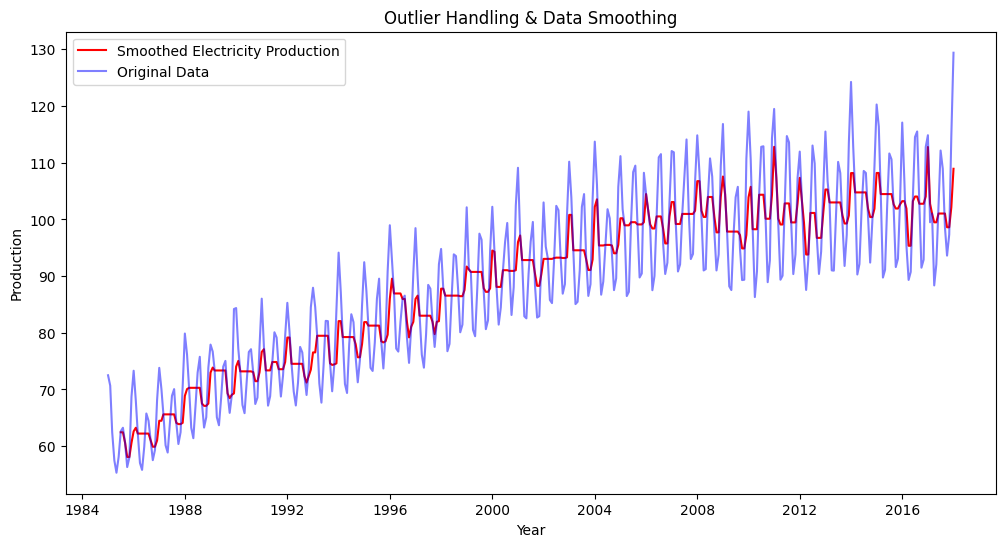

In [14]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Fill missing values using forward fill method
df.fillna(method='ffill', inplace=True)

# Handle outliers using rolling median, specifying the column explicitly
df['Production_Smoothed'] = df['IPG2211A2N'].rolling(window=7).median() # specify the column 'IPG2211A2N'

# Plot the smoothed vs original data
plt.figure(figsize=(12,6))
plt.plot(df['Production_Smoothed'], label="Smoothed Electricity Production", color='red')
plt.plot(df['IPG2211A2N'], label="Original Data", color='blue', alpha=0.5)
plt.title("Outlier Handling & Data Smoothing")
plt.xlabel("Year")
plt.ylabel("Production")
plt.legend()
plt.show()

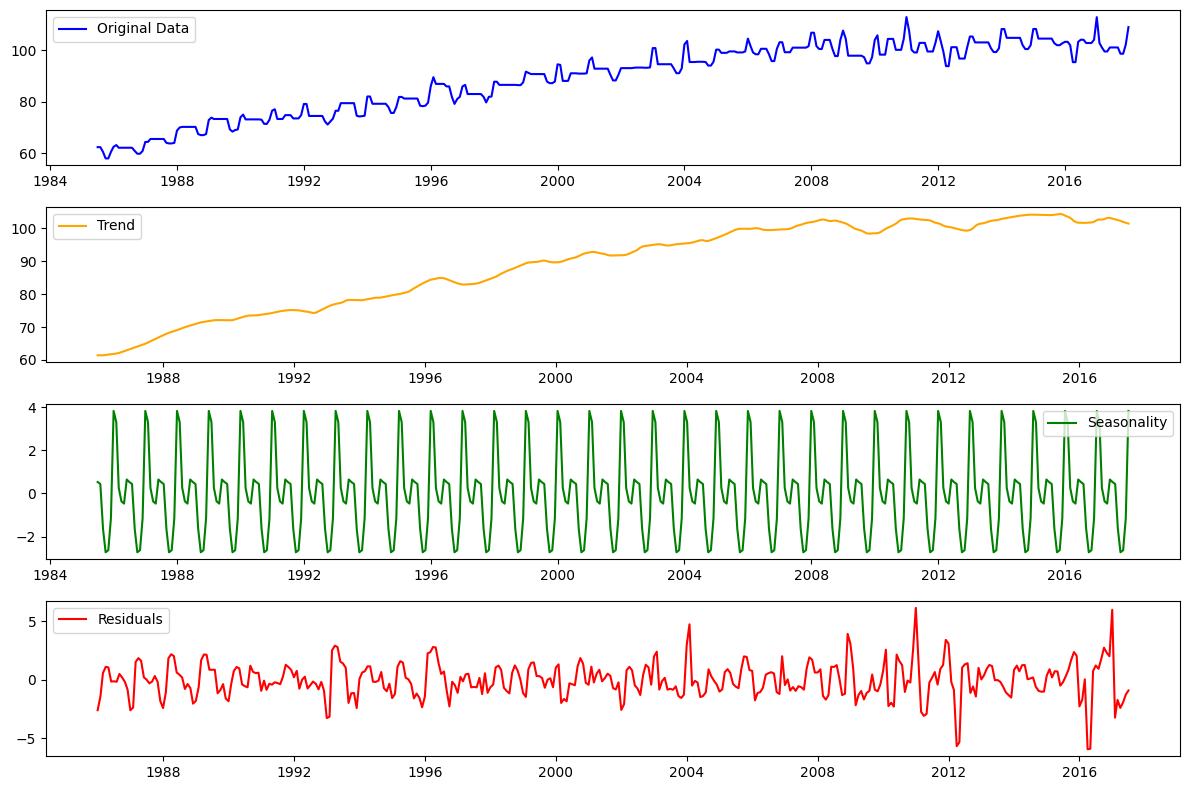

In [15]:
# Perform decomposition
decomposition = seasonal_decompose(df['Production_Smoothed'].dropna(), model='additive', period=12)

# Extract components
trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid

# Plot decomposition
plt.figure(figsize=(12,8))

plt.subplot(4,1,1)
plt.plot(df['Production_Smoothed'], label='Original Data', color='blue')
plt.legend()

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4,1,3)
plt.plot(seasonality, label='Seasonality', color='green')
plt.legend()

plt.subplot(4,1,4)
plt.plot(residuals, label='Residuals', color='red')
plt.legend()

plt.tight_layout()
plt.show()
